# Ch1: Neural Networks & Images

## Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import random
random.seed(17)

## Dataset


### Load CIFAR-10
- The CIFAR-10 dataset is a colored image dataset
- Data is 32 x 32 x 3
    - 32x32 is height/wdith
    - 3 is the number of color channels (RGB)
- Mix of vehicles and animals

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

CLASS_NAMES = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]

### Normalize
- Each color channel ranges from 0-255
- We want to normalize to 0-1 range

In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

### Preview Images

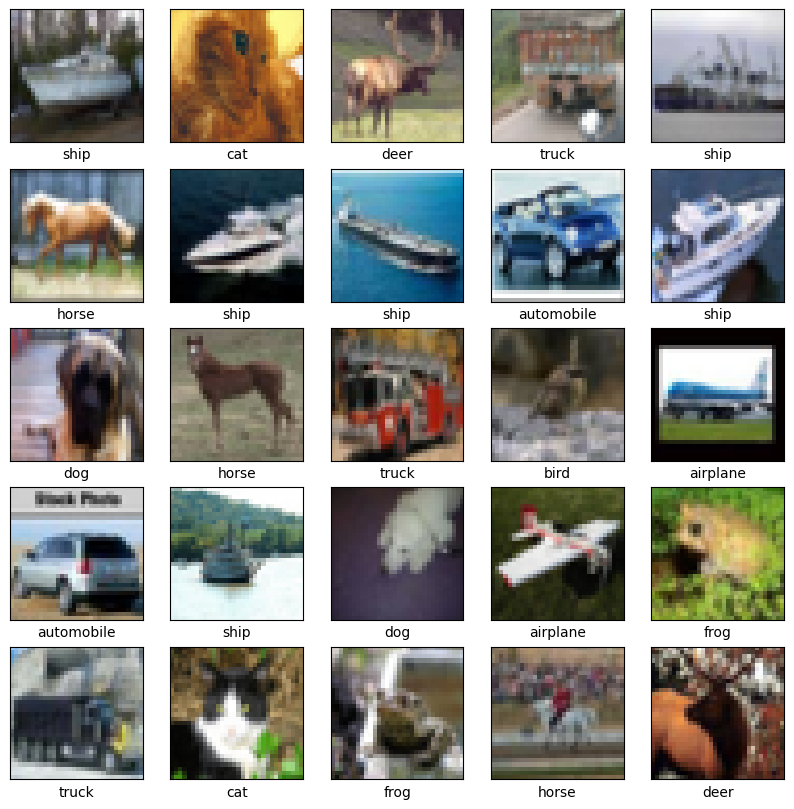

In [4]:
# view 25 images on 5x5 grid
train_idx = list(range(len(train_labels)))
random_sample = random.sample(train_idx, 25)

plt.figure(figsize=(10,10))
for i in range(len(random_sample)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[random_sample[i]], cmap=plt.cm.binary)
    plt.xlabel(CLASS_NAMES[train_labels[random_sample[i]][0]])
plt.show()

### View Color Channels

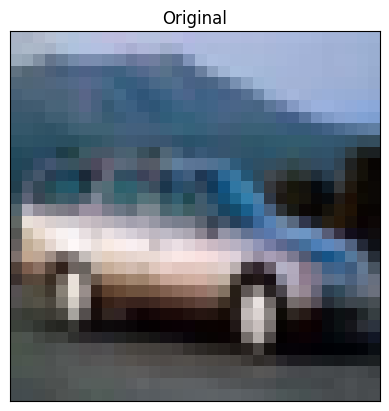

In [5]:
IMAGE_ID = 4
plt.figure()
plt.imshow(train_images[IMAGE_ID], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Original')
plt.show()

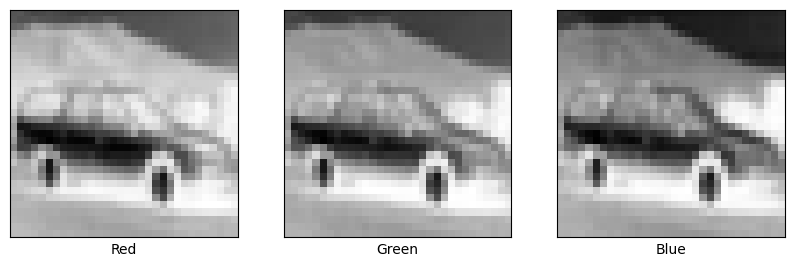

In [6]:
channels = ['Red', 'Green', 'Blue']
plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[IMAGE_ID][:,:, i], cmap=plt.cm.binary)
    plt.xlabel(channels[i])
plt.show()

## Model

### Train/Val/Test Split

In [7]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
validation_dataset = tf.data.Dataset.from_tensor_slices((test_images[:5000], test_labels[:5000]))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images[5000:], test_labels[5000:]))

TRAIN_DATASET_SIZE = len(train_dataset)
VALIDATION_DATASET_SIZE = len(validation_dataset)
TEST_DATASET_SIZE = len(test_dataset)

BATCH_SIZE = 128

train_dataset = train_dataset.shuffle(TRAIN_DATASET_SIZE).batch(BATCH_SIZE)
validation_dataset = validation_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

### Design Model

In [8]:
# build
model = tf.keras.Sequential([
    tf.keras.Input(shape=(32,32,3)),
    tf.keras.layers.Flatten(),                       
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'),                              
    tf.keras.layers.Dense(10),                             
])

# compile
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

### Train Model

In [9]:
model.fit(
    train_dataset,
    epochs=10, 
    validation_data=validation_dataset
)

_, accuracy = model.evaluate(test_dataset)
print(f'The model accuracy is {accuracy * 100:0.1f}%')

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.2349 - loss: 2.0979 - val_accuracy: 0.3340 - val_loss: 1.8564
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.3656 - loss: 1.7842 - val_accuracy: 0.4018 - val_loss: 1.6769
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3935 - loss: 1.6976 - val_accuracy: 0.4242 - val_loss: 1.6362
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4157 - loss: 1.6397 - val_accuracy: 0.4246 - val_loss: 1.6183
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4337 - loss: 1.5900 - val_accuracy: 0.4442 - val_loss: 1.5798
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4419 - loss: 1.5640 - val_accuracy: 0.4386 - val_loss: 1.5714
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4543 - loss: 1.5352 - val_accuracy: 0.4354 - val_loss: 1.5618
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4636 - loss: 1.5060 - val_accuracy: 0.

## Challenge 1

In [10]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
validation_dataset = tf.data.Dataset.from_tensor_slices((test_images[:5000], test_labels[:5000]))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images[5000:], test_labels[5000:]))

TRAIN_DATASET_SIZE = len(train_dataset)
VALIDATION_DATASET_SIZE = len(validation_dataset)
TEST_DATASET_SIZE = len(test_dataset)

BATCH_SIZE = 128

train_dataset = train_dataset.shuffle(TRAIN_DATASET_SIZE).batch(BATCH_SIZE)
validation_dataset = validation_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

VALIDATION_STEPS = VALIDATION_DATASET_SIZE // BATCH_SIZE

Make changes only in the cell below

In [11]:
# build
model = tf.keras.Sequential([
    tf.keras.Input(shape=(32,32,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'),                              
    tf.keras.layers.Dense(10),                             
])

# compile
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# train
model.fit(
    train_dataset,
    epochs=10, 
    validation_data=validation_dataset,
    validation_steps=VALIDATION_STEPS
)

_, accuracy = model.evaluate(test_dataset)
print(f'The model accuracy is {accuracy * 100:0.1f}%')

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.2419 - loss: 2.0876 - val_accuracy: 0.3644 - val_loss: 1.7598
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.3722 - loss: 1.7381 - val_accuracy: 0.4273 - val_loss: 1.6171
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.4134 - loss: 1.6327 - val_accuracy: 0.4441 - val_loss: 1.5363
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.4368 - loss: 1.5673 - val_accuracy: 0.4561 - val_loss: 1.5335
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.4586 - loss: 1.5182 - val_accuracy: 0.4728 - val_loss: 1.4746
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.4782 - loss: 1.4653 - val_accuracy: 0.4842 - val_loss: 1.4573
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.4864 - loss: 1.4298 - val_accuracy: 0.4824 - val_loss: 1.4474
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.5011 - loss: 1.3939 - 

## Challenge 2

Make changes only to the cell below

In [12]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images[:,:,:,0], train_labels))
validation_dataset = tf.data.Dataset.from_tensor_slices((test_images[:5000][:,:,:,0], test_labels[:5000]))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images[5000:][:,:,:,0], test_labels[5000:]))

TRAIN_DATASET_SIZE = len(train_dataset)
VALIDATION_DATASET_SIZE = len(validation_dataset)
TEST_DATASET_SIZE = len(test_dataset)

BATCH_SIZE = 128

train_dataset = train_dataset.shuffle(TRAIN_DATASET_SIZE).batch(BATCH_SIZE)
validation_dataset = validation_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

VALIDATION_STEPS = VALIDATION_DATASET_SIZE // BATCH_SIZE

# build
model = tf.keras.Sequential([
    tf.keras.Input(shape=(32,32)),
    tf.keras.layers.Flatten(),                       
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'),                              
    tf.keras.layers.Dense(10),                             
])

# compile
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# train
model.fit(
    train_dataset,
    epochs=10, 
    validation_data=validation_dataset,
    validation_steps=VALIDATION_STEPS
)

_, accuracy = model.evaluate(test_dataset)
print(f'The model accuracy is {accuracy * 100:0.1f}%')

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2026 - loss: 2.1659 - val_accuracy: 0.2939 - val_loss: 2.0064
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2920 - loss: 1.9743 - val_accuracy: 0.3217 - val_loss: 1.9015
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3167 - loss: 1.9039 - val_accuracy: 0.3237 - val_loss: 1.8984
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3352 - loss: 1.8636 - val_accuracy: 0.3307 - val_loss: 1.8566
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3453 - loss: 1.8344 - val_accuracy: 0.3528 - val_loss: 1.8317
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3526 - loss: 1.8112 - val_accuracy: 0.3736 - val_loss: 1.7883
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3680 - loss: 1.7701 - val_accuracy: 0.3692 - val_loss: 1.7864
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3737 - loss: 1.7635 - val_accuracy: 0.